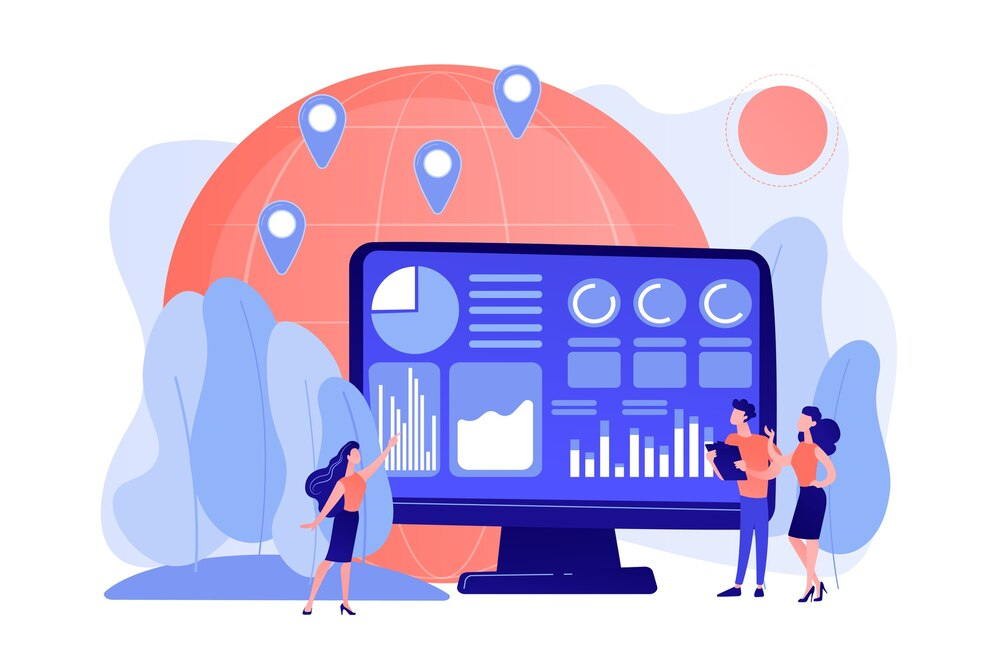

### **Installing required dependencies**

In [5]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=8965c38aa25dc70fdcf0bd8418d3c272632d8d79c6589712f23840c044bde543
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 18.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf
import pandas as pd

# Define the currency pair (CHFINR=X for CHF to INR)
currency_pair = 'CHFINR=X'

# Define the time period for which we want the data
start_date = '2012-12-1'
end_date = '2023-12-1'

# Fetching the data
data = yf.download(currency_pair, start=start_date, end=end_date)

# Resampling the data to get the last data point of each month
monthly_data = data.resample('M').last()

# Displaying the first few rows of the data
monthly_data

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_33/4066670068.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,59.835999,60.089001,59.609001,59.872002,59.872002,0
2013-01-31,58.457001,58.597000,58.256001,58.455002,58.455002,0
2013-02-28,57.933998,58.610001,57.640999,57.930000,57.930000,0
2013-03-31,56.949001,57.257000,56.855000,56.952000,56.952000,0
2013-04-30,57.796001,57.936001,57.317001,57.792999,57.792999,0
...,...,...,...,...,...,...
2023-07-31,93.222855,94.826569,93.222855,93.724770,93.724770,0
2023-08-31,94.103859,94.120651,93.400055,94.091171,94.091171,0
2023-09-30,90.869484,91.268005,90.603767,90.855278,90.855278,0


In [10]:
# Reset the index to turn it into a normal range index
monthly_data.reset_index(inplace=True)

In [11]:
# Save the data to an Excel file in order to compile it to the Master Excel
excel_file_name = 'Swiss_INR_Exchange_Rate_Monthly.xlsx'
monthly_data.to_excel(excel_file_name, index=False)  # Set index=False to not save the new range index

In [12]:
# Confirming that the file has been saved
print(f'Data saved to {excel_file_name}')

Data saved to Swiss_INR_Exchange_Rate_Monthly.xlsx


### **Importing Master File**
> *We compiled all the important parameters in Excel and importing it for furrther processing*

In [13]:
#Import master file
Master_df = pd.read_excel('/kaggle/input/master-excel/Master Excel.xls')
Master_df.head()

,Date,CPI_Home,CPI_Foreign,Nominal_Exchange_Rate,Real_Exchange_Rate
0,2013-01-01,84.539369,100.7043,59.872002,50.261421
1,2013-02-01,85.304431,101.0018,58.455002,49.370117
2,2013-03-01,85.686962,101.2213,57.930000,49.039538
3,2013-04-01,86.452024,101.2553,56.952000,48.625757
4,2013-05-01,87.217086,101.3667,57.792999,49.725768


#### **PART C: Log Transformation**

> *Taking the logarithm of these values is a common transformation in data analysis, especially in econometrics or financial analysis.*
> *It can help in linearizing exponential trends, stabilizing the variance across data, and making the data more suited for linear models like regression.*

In [14]:
#PART_C
# Calculating the logarithms
Master_df['Log_Nominal_Exchange_Rate'] = np.log(Master_df['Nominal_Exchange_Rate'])
Master_df['Log_Real_Exchange_Rate'] = np.log(Master_df['Real_Exchange_Rate'])
Master_df['Log_CPI_Home'] = np.log(Master_df['CPI_Home'])
Master_df['Log_CPI_Foreign'] = np.log(Master_df['CPI_Foreign'])

In [15]:
Master_df.dtypes

Date                         datetime64[ns]
CPI_Home                            float64
CPI_Foreign                         float64
Nominal_Exchange_Rate               float64
Real_Exchange_Rate                  float64
Log_Nominal_Exchange_Rate           float64
Log_Real_Exchange_Rate              float64
Log_CPI_Home                        float64
Log_CPI_Foreign                     float64
dtype: object

#### **PART D: Analyse the properties of the variables created in c**

> *We need to examine the stationarity in the time series data. Stationarity is a key assumption in many time series models, and if the data is non-stationary, we may need to transform it before modeling.*

> *For stationarity testing, we have used the Augmented Dickey-Fuller (ADF) test and Phillips-Perron test.*

Nominal_Exchange_Rate
--------------------------------------
Test Statistic: -0.0555
p-value: 0.9537
Lags Used: 2.0000
Number of Observations Used: 129.0000
Critical Value (1%): -3.4821
Critical Value (5%): -2.8842
Critical Value (10%): -2.5789
The series is non-stationary in trend.


Real_Exchange_Rate
--------------------------------------
Test Statistic: 0.9640
p-value: 0.9939
Lags Used: 2.0000
Number of Observations Used: 129.0000
Critical Value (1%): -3.4821
Critical Value (5%): -2.8842
Critical Value (10%): -2.5789
The series is non-stationary in trend.


CPI_Home
--------------------------------------
Test Statistic: 2.3681
p-value: 0.9990
Lags Used: 7.0000
Number of Observations Used: 124.0000
Critical Value (1%): -3.4842
Critical Value (5%): -2.8851
Critical Value (10%): -2.5794
The series is non-stationary in trend.


CPI_Foreign
--------------------------------------
Test Statistic: -1.1659
p-value: 0.6881
Lags Used: 13.0000
Number of Observations Used: 118.0000
Critical Val

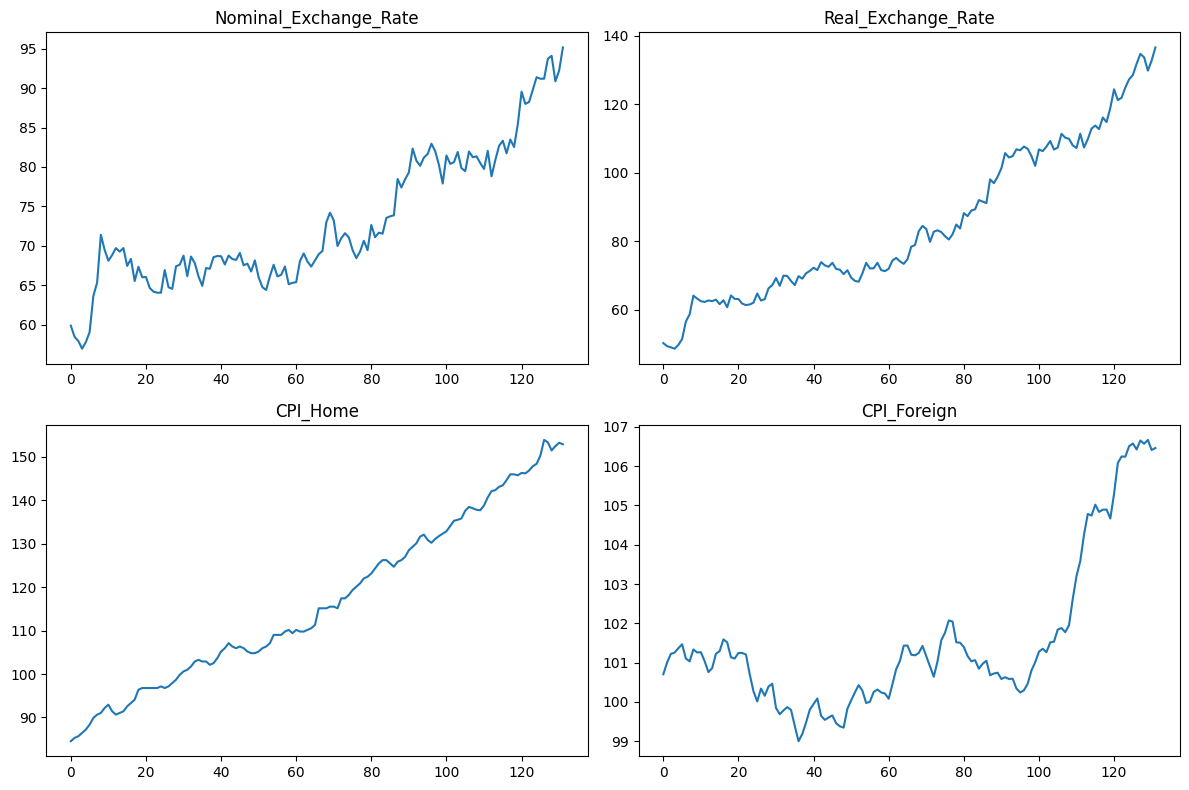

In [16]:
#Checking Stationarilty for original time series data

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 'p-value': result[1], 
              'Lags Used': result[2], 'Number of Observations Used': result[3]}
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value
    print(title)
    print('--------------------------------------')
    for key, value in output.items():
        print(f'{key}: {value:.4f}')
   
    # Check if series is non-stationary
    if result[0] > result[4]["5%"]:
        print("The series is non-stationary in trend.")
    else:
        print("The series is stationary.")
    print('\n')
    
# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['Nominal_Exchange_Rate', 'Real_Exchange_Rate', 'CPI_Home', 'CPI_Foreign']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    Master_df[var].plot(title=var)
    plt.tight_layout()
    adf_test(Master_df[var], title=var)

plt.show()

Log_Nominal_Exchange_Rate
--------------------------------------
Test Statistic: -0.7020
p-value: 0.8462
Lags Used: 3.0000
Number of Observations Used: 128.0000
Critical Value (1%): -3.4825
Critical Value (5%): -2.8844
Critical Value (10%): -2.5790
Failed to Reject Null Hypothesis for Log_Nominal_Exchange_Rate - Time Series has a Unit Root (Non-stationary)

Log_Real_Exchange_Rate
--------------------------------------
Test Statistic: -0.6028
p-value: 0.8703
Lags Used: 1.0000
Number of Observations Used: 130.0000
Critical Value (1%): -3.4817
Critical Value (5%): -2.8840
Critical Value (10%): -2.5788
Failed to Reject Null Hypothesis for Log_Real_Exchange_Rate - Time Series has a Unit Root (Non-stationary)

Log_CPI_Home
--------------------------------------
Test Statistic: -0.1318
p-value: 0.9462
Lags Used: 7.0000
Number of Observations Used: 124.0000
Critical Value (1%): -3.4842
Critical Value (5%): -2.8851
Critical Value (10%): -2.5794
Failed to Reject Null Hypothesis for Log_CPI_Home 

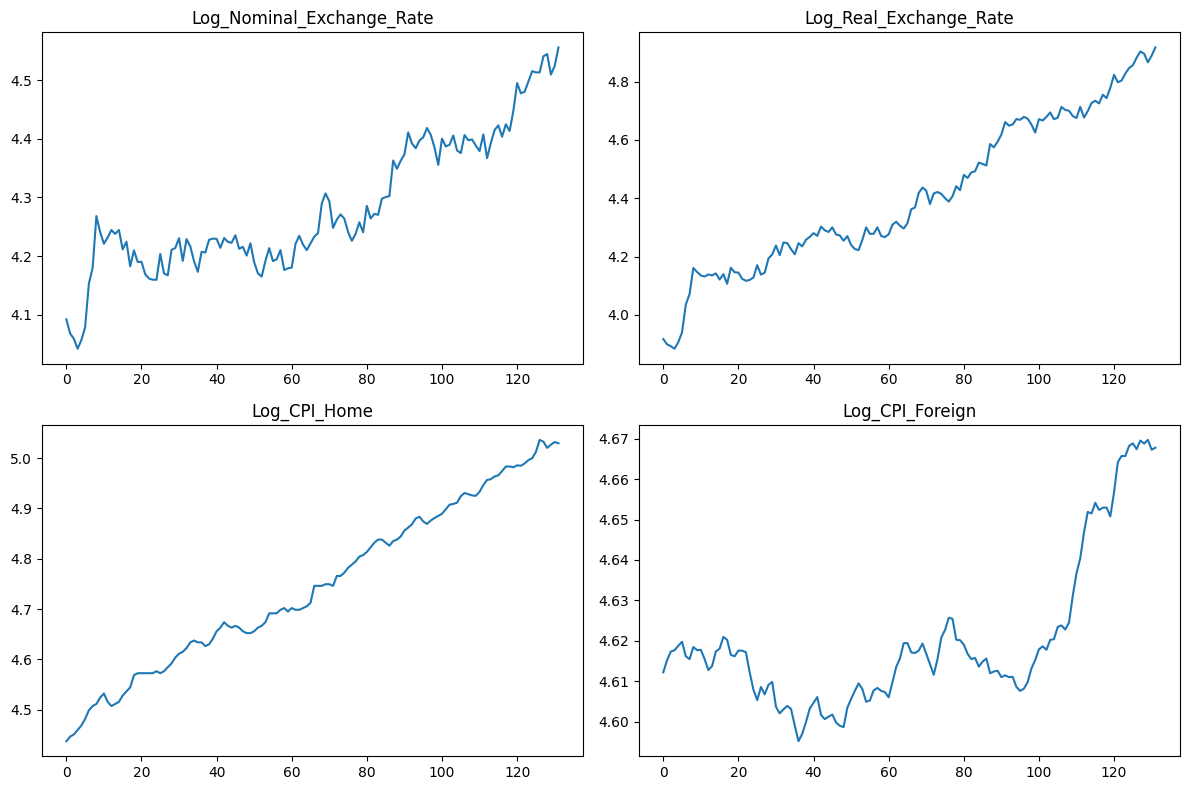

In [17]:
#Checking Stationarilty for log transformed time series data

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 'p-value': result[1], 
              'Lags Used': result[2], 'Number of Observations Used': result[3]}
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value
    print(title)
    print('--------------------------------------')
    for key, value in output.items():
        print(f'{key}: {value:.4f}')
    
    # Interpretation of the result
    if result[1] > 0.05:
        print(f"Failed to Reject Null Hypothesis for {title} - Time Series has a Unit Root (Non-stationary)\n")
    else:
        print(f"Reject Null Hypothesis for {title} - Time Series is Stationary\n")

# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['Log_Nominal_Exchange_Rate', 'Log_Real_Exchange_Rate', 'Log_CPI_Home', 'Log_CPI_Foreign']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    Master_df[var].plot(title=var)
    plt.tight_layout()
    adf_test(Master_df[var], title=var)

plt.show()

### **Phillips-Perron test**

Results for Log_Nominal_Exchange_Rate:
Test Statistic: -0.2317818828892726
p-value: 0.9346257438937678
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Failed to Reject Null Hypothesis for Log_Nominal_Exchange_Rate - Time Series has a Unit Root (Non-stationary)

Results for Log_Real_Exchange_Rate:
Test Statistic: -0.3559439172757118
p-value: 0.9171987859081971
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Failed to Reject Null Hypothesis for Log_Real_Exchange_Rate - Time Series has a Unit Root (Non-stationary)

Results for Log_CPI_Home:
Test Statistic: -0.9943069464518672
p-value: 0.7553350440019391
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Failed to Reject Null Hypothesis for Log_CPI_Home - Time Series has a Unit Root (Non-stationary)

Results for Log_CPI_Foreign:
Test Statistic: 0.5553700825106868
p-value: 0.9864623285714484
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Failed to Reject Null Hypothesis for Log_CPI_Foreign - Time Series has a Unit Root

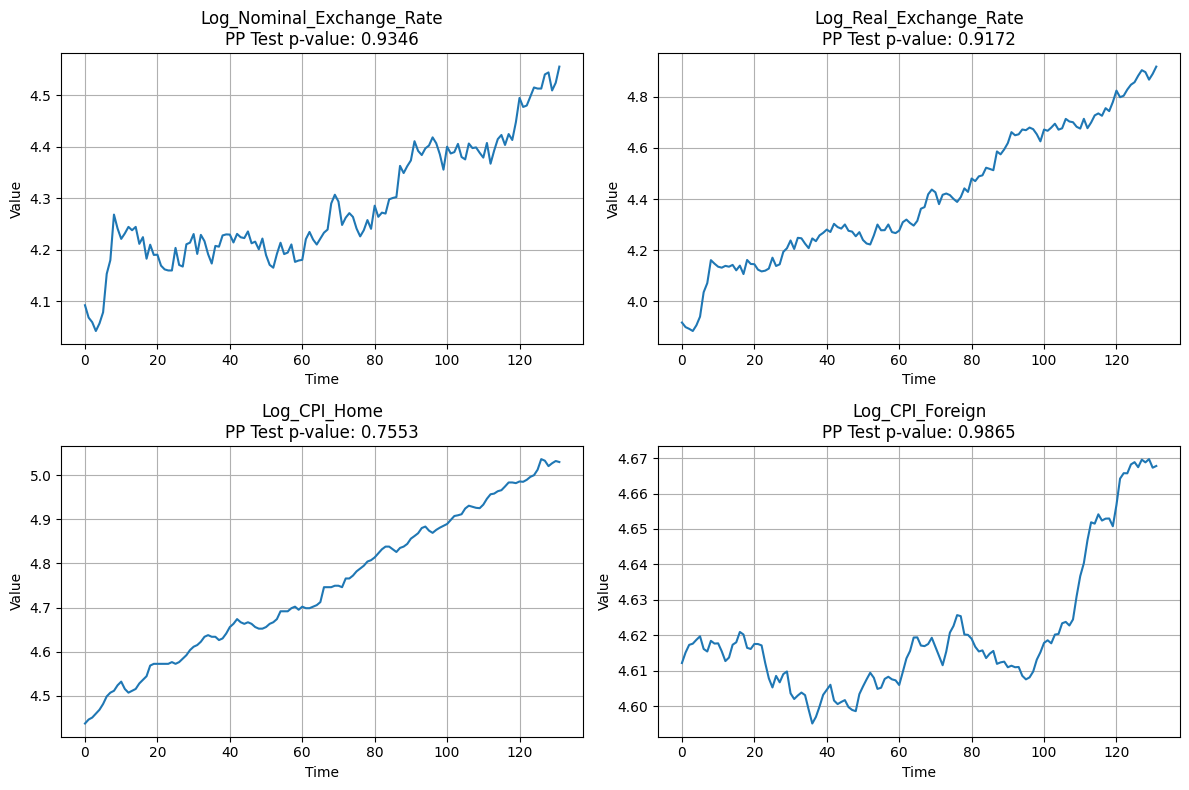

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import PhillipsPerron

# Load your dataset
# Master_df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file

variables = ['Log_Nominal_Exchange_Rate', 'Log_Real_Exchange_Rate', 'Log_CPI_Home', 'Log_CPI_Foreign']

# Set up the matplotlib figure and axes for a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop through each variable to perform Phillips-Perron test and plotting
for i, variable in enumerate(variables):
    # Locate the position of the current subplot
    ax = axes[i // 2, i % 2] 
    
    # Perform Phillips-Perron test
    data = Master_df[variable]
    pp_test = PhillipsPerron(data)

    # Plot the time series data
    ax.plot(data)
    ax.set_title(f'{variable}\nPP Test p-value: {pp_test.pvalue:.4f}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid(True)

    # Print the Phillips-Perron test results
    print(f"Results for {variable}:")
    print('Test Statistic:', pp_test.stat)
    print('p-value:', pp_test.pvalue)
    print('Critical Values:')
    for key, value in pp_test.critical_values.items():
        print(f'\t{key}: {value:.3f}')

    # Interpretation of the result
    if pp_test.pvalue > 0.05:
        print(f"Failed to Reject Null Hypothesis for {variable} - Time Series has a Unit Root (Non-stationary)\n")
    else:
        print(f"Reject Null Hypothesis for {variable} - Time Series is Stationary\n")

# Show the plot
plt.tight_layout()
plt.show()


## **The absolute form of Purchasing Power Parity**
> *Testing the absolute form of Purchasing Power Parity (PPP) using cointegration involves examining the relationship between the nominal exchange rate and the price levels (CPI) of two countries.*

#### **Prepare the Data**
> *We have already calculated the logarithms of the nominal exchange rate and the consumer price indexes (CPIs) for the home and foreign countries in Part C.*

In [19]:
absolute_PPP = Master_df[['Log_Nominal_Exchange_Rate', 'Log_CPI_Home', 'Log_CPI_Foreign']]

#### **Check for Integration**
> *Before applying cointegration tests, we have to ensure that all individual series are non-stationary but integrated of the same order (commonly I(1)). We used the Augmented Dickey-Fuller (ADF) test for this.*

In [50]:
# Loop through each column and perform ADF test
for column in absolute_PPP.columns:
    adf_test_result = adfuller(absolute_PPP[column].dropna())

    print(f'Results for {column}:')
    print(f'ADF Statistic: {adf_test_result[0]}')
    print(f'p-value: {adf_test_result[1]}')
    print('Critical Values:')
    for key, value in adf_test_result[4].items():
        print(f'   {key}: {value}')
    # Based on p-value, print a statement about the stationarity/integration of the column
    if adf_test_result[1] > 0.05:
        print("The series is non-stationary and needs differencing to be integrated of order I(1) or higher.\n")
    else:
        print("The series is stationary and integrated of order I(0).\n")



Results for Log_Nominal_Exchange_Rate:
ADF Statistic: -0.7020389211440912
p-value: 0.8462207042330149
Critical Values:
   1%: -3.4825006939887997
   5%: -2.884397984161377
   10%: -2.578960197753906
The series is non-stationary and needs differencing to be integrated of order I(1) or higher.

Results for Log_CPI_Home:
ADF Statistic: -0.13182984476370774
p-value: 0.9461744143914277
Critical Values:
   1%: -3.484219653271961
   5%: -2.885145235641637
   10%: -2.579359138917794
The series is non-stationary and needs differencing to be integrated of order I(1) or higher.

Results for Log_CPI_Foreign:
ADF Statistic: -1.1901070288434465
p-value: 0.6778368743297198
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
The series is non-stationary and needs differencing to be integrated of order I(1) or higher.



#### **Engle-Granger Cointegration Test**
> *The Engle-Granger method for cointegration testing applies to time series that are individually non-stationary but are suspected to have some long-term equilibrium relationship.*

In [49]:
#Step 1: Run a Regression
import statsmodels.api as sm

# Run a regression of log nominal exchange rate on log CPIs
X = sm.add_constant(absolute_PPP[['Log_CPI_Home', 'Log_CPI_Foreign']])
Y = absolute_PPP['Log_Nominal_Exchange_Rate']
model = sm.OLS(Y, X).fit()

#Step 2: Test the Residuals for Stationarity*
residuals = model.resid
adf_test_resid = adfuller(residuals.dropna())

print('ADF Statistic:', adf_test_resid[0])
print('p-value:', adf_test_resid[1])
for key, value in adf_test_resid[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretation of the results
if adf_test_resid[1] < 0.05:
    print("Reject the null hypothesis - The residuals are stationary. This suggests a cointegrating relationship, indicating Absolute PPP holds.")
else:
    print("Fail to reject the null hypothesis - The residuals are non-stationary. This suggests no cointegrating relationship, indicating Absolute PPP does not hold.")

ADF Statistic: -3.281945132467443
p-value: 0.015705071470476673
Critical Value (1%): -3.481281802271349
Critical Value (5%): -2.883867891664528
Critical Value (10%): -2.5786771965503177
Reject the null hypothesis - The residuals are stationary. This suggests a cointegrating relationship, indicating Absolute PPP holds.


### **The relative form of Purchasing Power Parity**
> *Checking for the relative form of Purchasing Power Parity (PPP) involves comparing changes in exchange rates with changes in price levels between two countries.*

#### **Calculate Inflation Rates and Exchange Rate Changes**
> *First, calculate the inflation rates for both the home and foreign countries. Inflation rate is typically calculated as the percentage change in Consumer Price Index (CPI).*


In [22]:
#Calculate infaltion rate fro home and foreign country
Master_df['inflation_home'] = Master_df['CPI_Home'].pct_change() * 100
Master_df['inflation_foreign'] = Master_df['CPI_Foreign'].pct_change() * 100

#Calculate the percentage change in the nominal exchange rate.
Master_df['exchange_rate_change'] = Master_df['Nominal_Exchange_Rate'].pct_change() * 100


#### **Regression Analysis**
> *Perform a regression analysis where the dependent variable is the change in the nominal exchange rate and the independent variable is the difference in inflation rates.*

In [23]:
import statsmodels.api as sm

# Dependent variable: changes in exchange rate
Y = Master_df['exchange_rate_change'].dropna()

# Independent variable: inflation rate differential
X = (Master_df['inflation_home'] - Master_df['inflation_foreign']).dropna()

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     exchange_rate_change   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.7484
Date:                  Thu, 04 Apr 2024   Prob (F-statistic):              0.389
Time:                          14:42:39   Log-Likelihood:                -300.79
No. Observations:                   131   AIC:                             605.6
Df Residuals:                       129   BIC:                             611.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2852      0.240

### **Modeling**
> Creating five ARIMA models based on five different (p,d,q) values using diff_Log_Real_Exchange_Rate data, which is stationary.

In [24]:
# Log_Real_Exchange_Rate is not stationary, so have to perform transformation technique to make it stationary for ARIMA modeling

Master_df['diff_Log_Real_Exchange_Rate'] = Master_df['Log_Real_Exchange_Rate'].diff().dropna()

In [25]:
# Checking number of Null values
null_counts = Master_df.isnull().sum()

# This will print the count of null values for each column
print(null_counts)

Date                           0
CPI_Home                       0
CPI_Foreign                    0
Nominal_Exchange_Rate          0
Real_Exchange_Rate             0
Log_Nominal_Exchange_Rate      0
Log_Real_Exchange_Rate         0
Log_CPI_Home                   0
Log_CPI_Foreign                0
inflation_home                 1
inflation_foreign              1
exchange_rate_change           1
diff_Log_Real_Exchange_Rate    1
dtype: int64


In [26]:
#Master_df_new = Master_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
Master_df_new = Master_df.dropna()  # Fill with mean
Master_df_new

,Date,CPI_Home,CPI_Foreign,Nominal_Exchange_Rate,Real_Exchange_Rate,Log_Nominal_Exchange_Rate,Log_Real_Exchange_Rate,Log_CPI_Home,Log_CPI_Foreign,inflation_home,inflation_foreign,exchange_rate_change,diff_Log_Real_Exchange_Rate
1,2013-02-01,85.304431,101.0018,58.455002,49.370117,4.068257,3.899345,4.446226,4.615138,0.904977,0.295419,-2.366715,-0.017892
2,2013-03-01,85.686962,101.2213,57.930000,49.039538,4.059235,3.892627,4.450701,4.617309,0.448430,0.217323,-0.898129,-0.006718
3,2013-04-01,86.452024,101.2553,56.952000,48.625757,4.042209,3.884153,4.459590,4.617645,0.892857,0.033590,-1.688246,-0.008473
4,2013-05-01,87.217086,101.3667,57.792999,49.725768,4.056868,3.906523,4.468400,4.618745,0.884956,0.110019,1.476681,0.022370
5,2013-06-01,88.364680,101.4664,59.061001,51.434824,4.078571,3.940315,4.481472,4.619728,1.315789,0.098356,2.194040,0.033792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-01,153.364995,106.6516,93.724770,134.776214,4.540363,4.903616,5.032821,4.669567,-0.357910,0.213485,2.780265,0.021705
128,2023-09-01,151.492003,106.5695,94.091171,133.753654,4.544264,4.896000,5.020533,4.668797,-1.221264,-0.076980,0.390934,-0.007616
129,2023-10-01,152.483587,106.6673,90.855278,129.879904,4.509268,4.866610,5.027057,4.669715,0.654545,0.091771,-3.439104,-0.029389
130,2023-11-01,153.254819,106.4094,92.220200,132.818999,4.524179,4.888987,5.032102,4.667294,0.505780,-0.241780,1.502303,0.022377


In [27]:
Model_df = Master_df_new[['Date','diff_Log_Real_Exchange_Rate']]

### Checking stationarity of Differenced log transformed Real Exchange Rate Data

diff_Log_Real_Exchange_Rate
--------------------------------------
Test Statistic: -12.4815
p-value: 0.0000
Lags Used: 0.0000
Number of Observations Used: 130.0000
Critical Value (1%): -3.4817
Critical Value (5%): -2.8840
Critical Value (10%): -2.5788
The series is stationary.




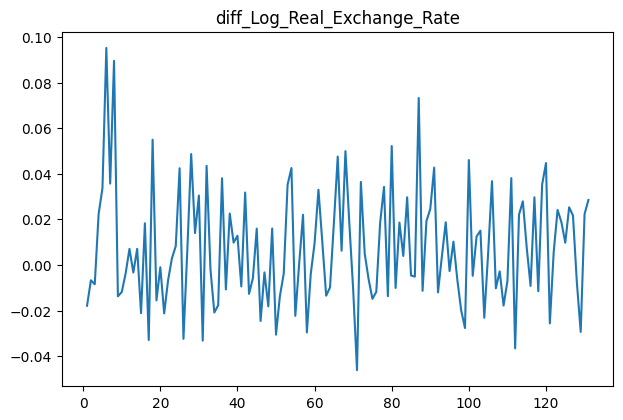

In [28]:
# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 'p-value': result[1], 
              'Lags Used': result[2], 'Number of Observations Used': result[3]}
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value
    print(title)
    print('--------------------------------------')
    for key, value in output.items():
        print(f'{key}: {value:.4f}')
# Check if series is non-stationary
    if result[0] > result[4]["5%"]:
        print("The series is non-stationary in trend.")
    else:
        print("The series is stationary.")
    print('\n')
    
# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['diff_Log_Real_Exchange_Rate']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    Model_df[var].plot(title=var)
    plt.tight_layout()
    adf_test(Model_df[var], title=var)

plt.show()

### **ACF and PACF Plots**

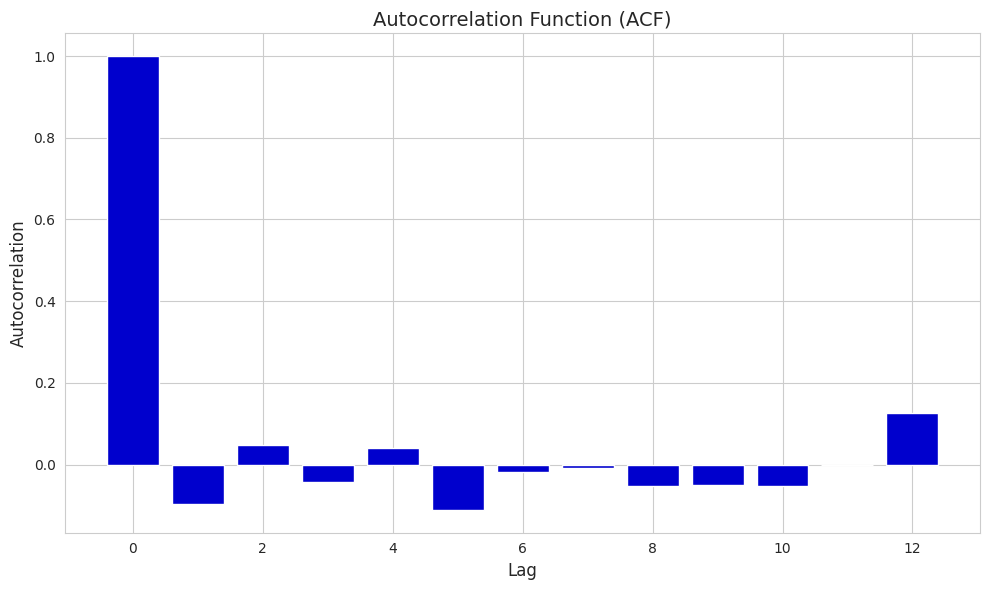

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns

# Use seaborn style for better aesthetics
sns.set_style('whitegrid')

# Calculate ACF values
acf_values = acf(Model_df['diff_Log_Real_Exchange_Rate'], nlags=12)

# Create figure and axis objects and set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF values
ax.bar(range(len(acf_values)), acf_values, color='mediumblue')

# Add labels and title
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Autocorrelation', fontsize=12)
ax.set_title('Autocorrelation Function (ACF)', fontsize=14)

# Add grid
ax.grid(True)

# Add a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot with improved layout
plt.show()

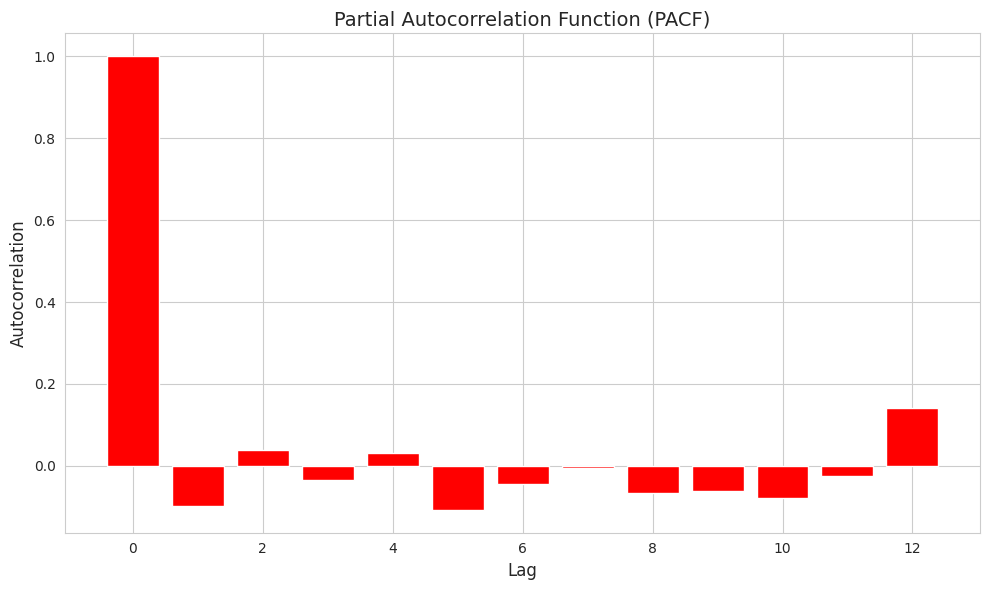

In [31]:
# Use seaborn style for better aesthetics
sns.set_style('whitegrid')

# Calculate ACF values
acf_values = pacf(Model_df['diff_Log_Real_Exchange_Rate'], nlags=12)

# Create figure and axis objects and set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF values
ax.bar(range(len(acf_values)), acf_values, color='red')

# Add labels and title
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Autocorrelation', fontsize=12)
ax.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)

# Add grid
ax.grid(True)

# Add a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot with improved layout
plt.show()


In [34]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# First, ensure that your dataframe is sorted by date
Model_df = Model_df.sort_index()

# Decide the split size for training and testing, e.g., 80% for training
split_fraction = 0.8
split_point = int(len(Model_df) * split_fraction)

# Split the data into training and testing sets
train = Model_df.iloc[:split_point]
test = Model_df.iloc[split_point:]

# To avoid convergence warnings
warnings.filterwarnings("ignore")

# List to hold results
model_results = []

# Define different ARIMA orders to try
orders = [(1, 0, 0), (1, 0, 1), (1, 0, 2), (2, 0, 1), (1, 0, 11)]

for order in orders:
    # Fit the ARIMA model
    model = ARIMA(train['diff_Log_Real_Exchange_Rate'], order=order)
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(test['diff_Log_Real_Exchange_Rate'], predictions)
    rmse = sqrt(mean_squared_error(test['diff_Log_Real_Exchange_Rate'], predictions))
    mape = mean_absolute_percentage_error(test['diff_Log_Real_Exchange_Rate'], predictions)
    
    # Get AIC and BIC
    aic = model_fit.aic
    bic = model_fit.bic
    
    # Append results
    model_results.append((order, mae, rmse, mape, aic, bic))

In [35]:
# Convert the results into a pandas DataFrame
results_df = pd.DataFrame(model_results, columns=['ARIMA Order', 'MAE', 'RMSE', 'MAPE', 'AIC', 'BIC'])

# Display the DataFrame
results_df

,ARIMA Order,MAE,RMSE,MAPE,AIC,BIC
0,"(1, 0, 0)",0.019293,0.022186,1.065497,-455.205391,-447.272218
1,"(1, 0, 1)",0.019210,0.022168,1.051347,-454.824967,-444.247403
2,"(1, 0, 2)",0.019327,0.022328,1.041243,-453.182918,-439.960964
3,"(2, 0, 1)",0.019269,0.022266,1.039525,-453.117683,-439.895728
4,"(1, 0, 11)",0.020134,0.023905,1.047057,-444.618310,-407.596838


### Creating 5 ARIMA models using Log_Real_Exchange_Rate dataset which is non stationary.

In [36]:
Model_df_2 = Master_df[['Date','Log_Real_Exchange_Rate']]
Model_df_2

,Date,Log_Real_Exchange_Rate
0,2013-01-01,3.917238
1,2013-02-01,3.899345
2,2013-03-01,3.892627
3,2013-04-01,3.884153
4,2013-05-01,3.906523
...,...,...
127,2023-08-01,4.903616
128,2023-09-01,4.896000
129,2023-10-01,4.866610
130,2023-11-01,4.888987


Log_Real_Exchange_Rate
--------------------------------------
Test Statistic: -0.6028
p-value: 0.8703
Lags Used: 1.0000
Number of Observations Used: 130.0000
Critical Value (1%): -3.4817
Critical Value (5%): -2.8840
Critical Value (10%): -2.5788




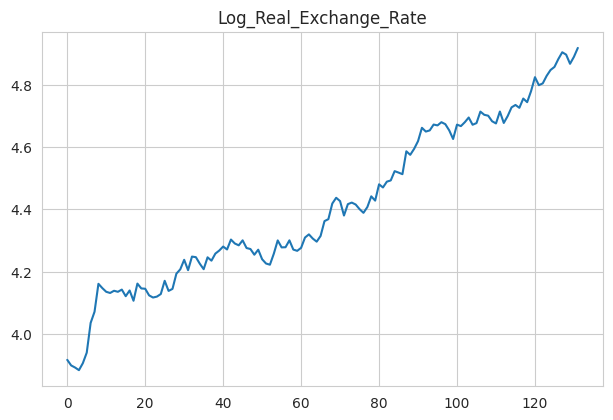

In [37]:
# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 'p-value': result[1], 
              'Lags Used': result[2], 'Number of Observations Used': result[3]}
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value
    print(title)
    print('--------------------------------------')
    for key, value in output.items():
        print(f'{key}: {value:.4f}')
    print('\n')

# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['Log_Real_Exchange_Rate']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    Model_df_2[var].plot(title=var)
    plt.tight_layout()
    adf_test(Model_df_2[var], title=var)

plt.show()

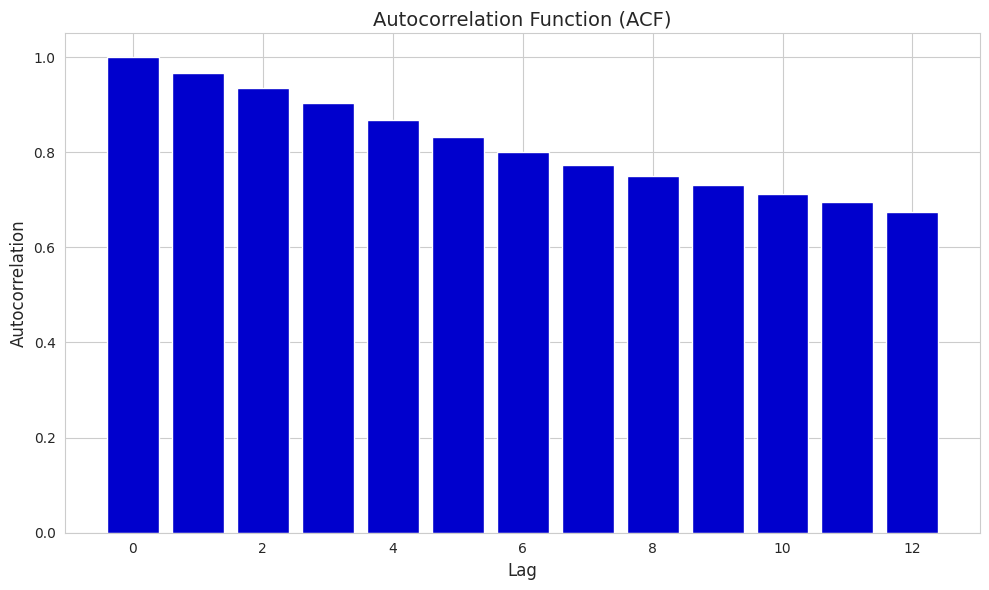

In [38]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns

# Use seaborn style for better aesthetics
sns.set_style('whitegrid')

# Calculate ACF values
acf_values = acf(Model_df_2['Log_Real_Exchange_Rate'], nlags=12)

# Create figure and axis objects and set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF values
ax.bar(range(len(acf_values)), acf_values, color='mediumblue')

# Add labels and title
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Autocorrelation', fontsize=12)
ax.set_title('Autocorrelation Function (ACF)', fontsize=14)

# Add grid
ax.grid(True)

# Add a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot with improved layout
plt.show()

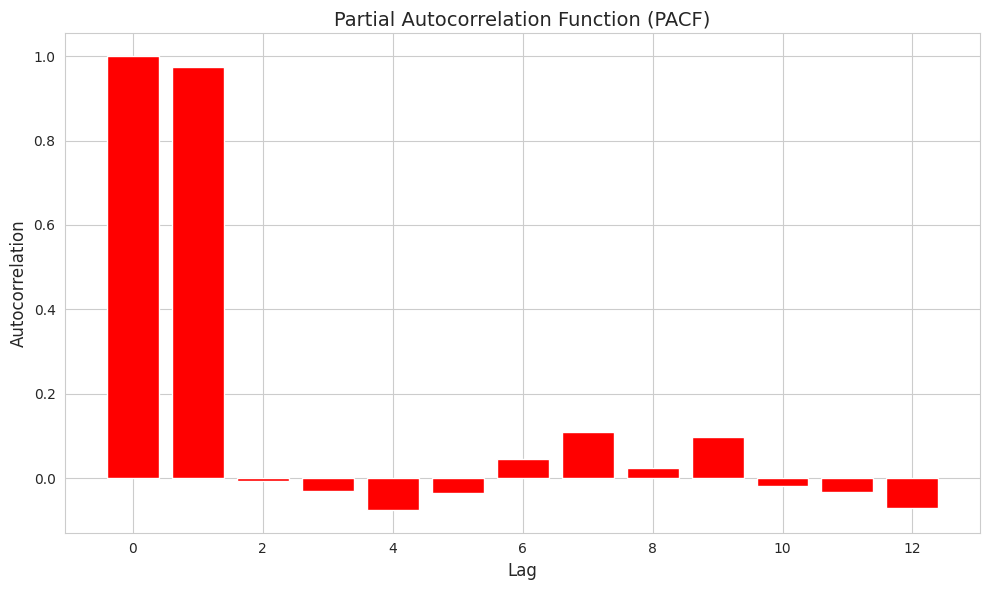

In [39]:
# Use seaborn style for better aesthetics
sns.set_style('whitegrid')

# Calculate ACF values
acf_values = pacf(Model_df_2['Log_Real_Exchange_Rate'], nlags=12)

# Create figure and axis objects and set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF values
ax.bar(range(len(acf_values)), acf_values, color='red')

# Add labels and title
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Autocorrelation', fontsize=12)
ax.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)

# Add grid
ax.grid(True)

# Add a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot with improved layout
plt.show()


In [42]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# First, ensure that your dataframe is sorted by date
Model_df_2 = Model_df_2.sort_index()

# Decide the split size for training and testing, e.g., 80% for training
split_fraction = 0.8
split_point = int(len(Model_df) * split_fraction)

# Split the data into training and testing sets
train = Model_df_2.iloc[:split_point]
test = Model_df_2.iloc[split_point:]

# To avoid convergence warnings
warnings.filterwarnings("ignore")

# List to hold results
model_results = []

# Define different ARIMA orders to try
orders = [(1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 1, 1), (1, 1, 3)]

for order in orders:
    # Fit the ARIMA model
    model = ARIMA(train['Log_Real_Exchange_Rate'], order=order)
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(test['Log_Real_Exchange_Rate'], predictions)
    rmse = sqrt(mean_squared_error(test['Log_Real_Exchange_Rate'], predictions))
    mape = mean_absolute_percentage_error(test['Log_Real_Exchange_Rate'], predictions)
    
    # Get AIC and BIC
    aic = model_fit.aic
    bic = model_fit.bic
    
    # Append results
    model_results.append((order, mae, rmse, mape, aic, bic))

In [43]:
# Convert the results into a pandas DataFrame
results_df_2 = pd.DataFrame(model_results, columns=['ARIMA Order', 'MAE', 'RMSE', 'MAPE', 'AIC', 'BIC'])

# Display the DataFrame
results_df_2

,ARIMA Order,MAE,RMSE,MAPE,AIC,BIC
0,"(1, 1, 0)",0.086502,0.113809,0.017865,-444.417299,-439.147841
1,"(1, 1, 1)",0.031766,0.037293,0.006683,-447.378515,-439.474328
2,"(1, 1, 2)",0.082240,0.109172,0.016982,-443.643977,-433.105061
3,"(2, 1, 1)",0.082523,0.109493,0.017041,-444.096959,-433.558044
4,"(1, 1, 3)",0.084532,0.111732,0.017457,-441.375987,-428.202342


### Predictions
> Given that ARIMA(1, 0, 0) is identified as the best model based on your criteria, you can now train this model on the entire dataset (Model_df) and make future predictions. Here's how you can do it:

In [44]:
# Fit ARIMA(1, 0, 0) model on the entire dataset
model = ARIMA(Model_df['diff_Log_Real_Exchange_Rate'], order=(1, 0, 0))
model_fit = model.fit()

In [45]:
#Make Future Predictions
# Number of future periods to forecast
n_periods = 12

# Make predictions
future_forecast = model_fit.forecast(steps=n_periods)

print(future_forecast)

131    0.005613
132    0.007832
133    0.007617
134    0.007638
135    0.007636
136    0.007636
137    0.007636
138    0.007636
139    0.007636
140    0.007636
141    0.007636
142    0.007636
Name: predicted_mean, dtype: float64


In [47]:
#Converting Predictions Back to Original Scale

# Assuming 'Log_Real_Exchange_Rate' is the original non-differenced series
last_value = Model_df_2['Log_Real_Exchange_Rate'].iloc[-1]

# Convert predictions back to original scale
converted_forecast = last_value + future_forecast.cumsum()

print(converted_forecast)


131    4.923158
132    4.930990
133    4.938607
134    4.946244
135    4.953880
136    4.961516
137    4.969152
138    4.976788
139    4.984424
140    4.992060
141    4.999696
142    5.007331
Name: predicted_mean, dtype: float64


### Plotting the Historical Data along with the Forecast

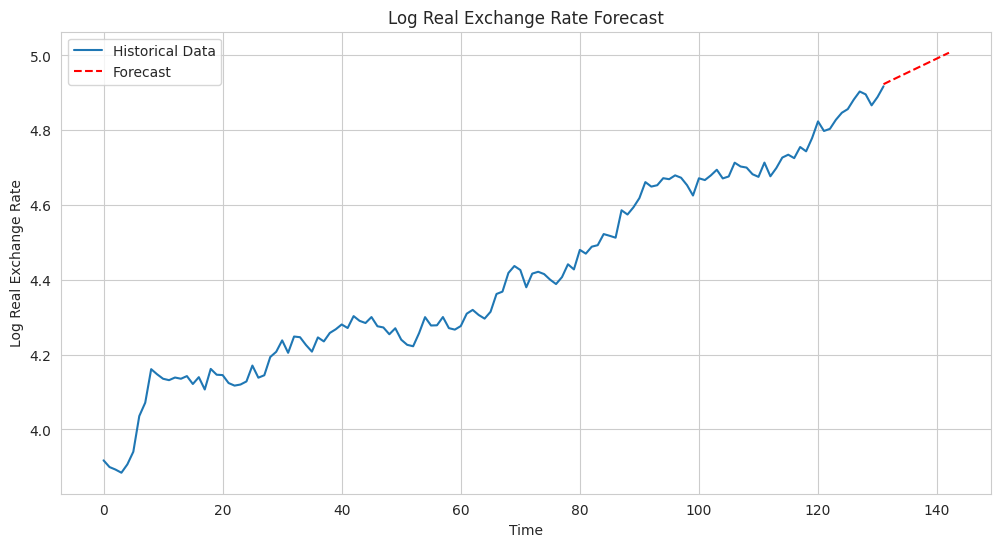

In [48]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(Model_df_2['Log_Real_Exchange_Rate'], label='Historical Data')

# Create an index for your forecast for plotting
forecast_index = range(len(Model_df), len(Model_df) + n_periods)

# Plot forecasted data
plt.plot(forecast_index, converted_forecast, label='Forecast', linestyle='--', color='red')

# Adding titles and labels
plt.title('Log Real Exchange Rate Forecast')
plt.xlabel('Time')
plt.ylabel('Log Real Exchange Rate')

# Show legend
plt.legend()

# Display the plot
plt.show()
